In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [44]:
df = pd.read_csv('/kaggle/input/premier-league/Data.csv')

In [45]:
df.head(5)

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date
0,2,West Ham United,2,Arsenal,NaN,David Coote,"London Stadium, London",2022/23,"Sun 16 Apr 2023, 14:00 BST"
1,2,Tottenham Hotspur,3,Bournemouth,"Att: 61,369",Andy Madley,"Tottenham Hotspur Stadium, London",2022/23,"Sat 15 Apr 2023, 15:15 BST"
2,0,Southampton,2,Crystal Palace,"Att: 30,309",Michael Oliver,"St. Mary's Stadium, Southampton",2022/23,"Sat 15 Apr 2023, 15:00 BST"
3,0,Nottingham Forest,2,Manchester United,"Att: 29,435",Simon Hooper,"The City Ground, Nottingham",2022/23,"Sun 16 Apr 2023, 16:30 BST"
4,3,Manchester City,1,Leicester City,"Att: 53,329",Darren England,"Etihad Stadium, Manchester",2022/23,"Sat 15 Apr 2023, 17:30 BST"


In [46]:
'Sun 16 Apr 2023, 14:00 BST'.split(' ')[4]

'14:00'

In [47]:

df = df[~(df['Home_team_score'] == 'Home_team_score')]
df = df[~(df['Home_team_score'] == 'A')]

In [48]:
df['Home_team_score'].value_counts()

1     10359
0      7844
2      7767
3      4170
4      1810
5       734
6       313
7       135
8        46
9        22
10       17
11        4
13        4
20        1
17        1
Name: Home_team_score, dtype: int64

In [49]:
df['Away_team_score'] = df['Away_team_score'].astype(int)
df['Home_team_score'] = df['Home_team_score'].astype(int)

**Get number of Paticipant, Split att: **

In [50]:
df['attendance'] = df['attendance'].str.split(':', n=1, expand=True)[1]
df['attendance'] = df['attendance'].str.replace(',','')

Convert to numeric

In [51]:
df['attendance'] = pd.to_numeric(df['attendance'], errors='coerce')

In [52]:
df['attendance']

0            NaN
1        61369.0
2        30309.0
3        29435.0
4        53329.0
          ...   
33225    18822.0
33226    40491.0
33227    30720.0
33228    30592.0
33229    31231.0
Name: attendance, Length: 33227, dtype: float64

# Fill Nan Value

In [53]:
mean_value = df['attendance'].mean()
df['attendance'].fillna(mean_value, inplace=True)

In [54]:
df.isnull().sum()

Home_team_score        0
Home_team_name         0
Away_team_score        0
Away_team_name         0
attendance             0
referee            17946
stadium                0
Season                 0
Date                   0
dtype: int64

# Replace , in attendance

In [55]:
df.head(10)

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date
0,2,West Ham United,2,Arsenal,14652.083333,David Coote,"London Stadium, London",2022/23,"Sun 16 Apr 2023, 14:00 BST"
1,2,Tottenham Hotspur,3,Bournemouth,61369.000000,Andy Madley,"Tottenham Hotspur Stadium, London",2022/23,"Sat 15 Apr 2023, 15:15 BST"
2,0,Southampton,2,Crystal Palace,30309.000000,Michael Oliver,"St. Mary's Stadium, Southampton",2022/23,"Sat 15 Apr 2023, 15:00 BST"
3,0,Nottingham Forest,2,Manchester United,29435.000000,Simon Hooper,"The City Ground, Nottingham",2022/23,"Sun 16 Apr 2023, 16:30 BST"
4,3,Manchester City,1,Leicester City,53329.000000,Darren England,"Etihad Stadium, Manchester",2022/23,"Sat 15 Apr 2023, 17:30 BST"
5,1,Everton,3,Fulham,14652.083333,Anthony Taylor,"Goodison Park, Liverpool",2022/23,"Sat 15 Apr 2023, 15:00 BST"
6,1,Chelsea,2,Brighton & Hove Albion,40126.000000,Robert Jones,"Stamford Bridge, London",2022/23,"Sat 15 Apr 2023, 15:00 BST"
7,3,Aston Villa,0,Newcastle United,42055.000000,John Brooks,"Villa Park, Birmingham",2022/23,"Sat 15 Apr 2023, 12:30 BST"
8,1,Wolverhampton Wanderers,0,Chelsea,31614.000000,Peter Bankes,"Molineux Stadium, Wolverhampton",2022/23,"Sat 8 Apr 2023, 15:00 BST"
9,2,Tottenham Hotspur,1,Brighton & Hove Albion,61405.000000,Stuart Attwell,"Tottenham Hotspur Stadium, London",2022/23,"Sat 8 Apr 2023, 15:00 BST"


In [56]:
Liver = df[df['Home_team_name'] == 'Liverpool']

# Result Column ['Win','Defeat']

In [57]:
def result(data):
    if data['Home_team_score'] > data['Away_team_score']:
        return 'Win'
    elif data['Home_team_score'] == data['Away_team_score']:
        return 'Draw'
    else:
        return 'Defeat'

In [58]:
df['Result'] = df.apply(result, axis = 1)

Which team has the most time win in home

In [59]:
df['Home_team_name'].unique()

array(['West Ham United', 'Tottenham Hotspur', 'Southampton', ...,
       'FC Sion', 'Neuchâtel Xamax', 'Istanbulspor'], dtype=object)

# Analyse with LiverPool team, cause that my favorite team  :))

In [60]:
Liver = df[df['Home_team_name'] == 'Liverpool']

In [61]:
Liver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 12 to 33218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Home_team_score  216 non-null    int64  
 1   Home_team_name   216 non-null    object 
 2   Away_team_score  216 non-null    int64  
 3   Away_team_name   216 non-null    object 
 4   attendance       216 non-null    float64
 5   referee          178 non-null    object 
 6   stadium          216 non-null    object 
 7   Season           216 non-null    object 
 8   Date             216 non-null    object 
 9   Result           216 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 18.6+ KB


In [62]:
Liver['Result'].value_counts()/(Liver['Result'].shape[0])

Win       0.634259
Draw      0.208333
Defeat    0.157407
Name: Result, dtype: float64

**Result in Home**

<Axes: xlabel='Result', ylabel='Count'>

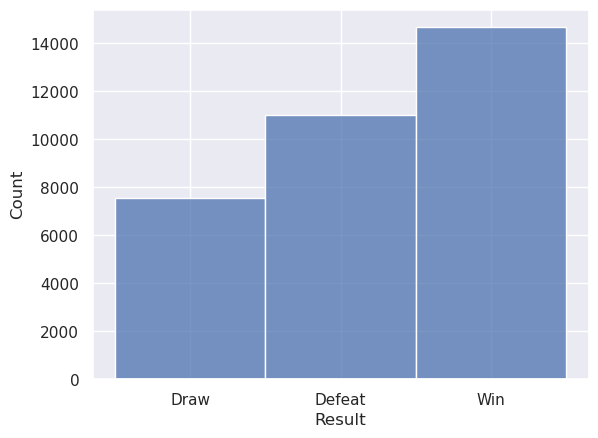

In [63]:
sns.histplot(df['Result'])

<Axes: xlabel='Result', ylabel='Count'>

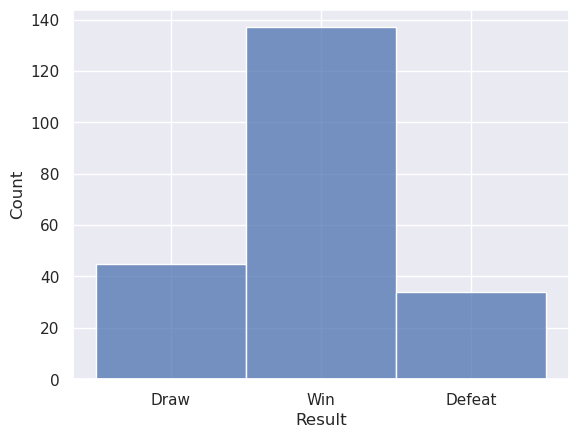

In [64]:
sns.histplot(Liver['Result'])

> In terms of home games, Liverpool has recorded 137 wins, which accounts for 63% of their matches. They have also had 45 draws, constituting 20% of their games, while suffering 34 losses, making up 17% of their total home fixtures.

# The result shows that out of the seven referees.

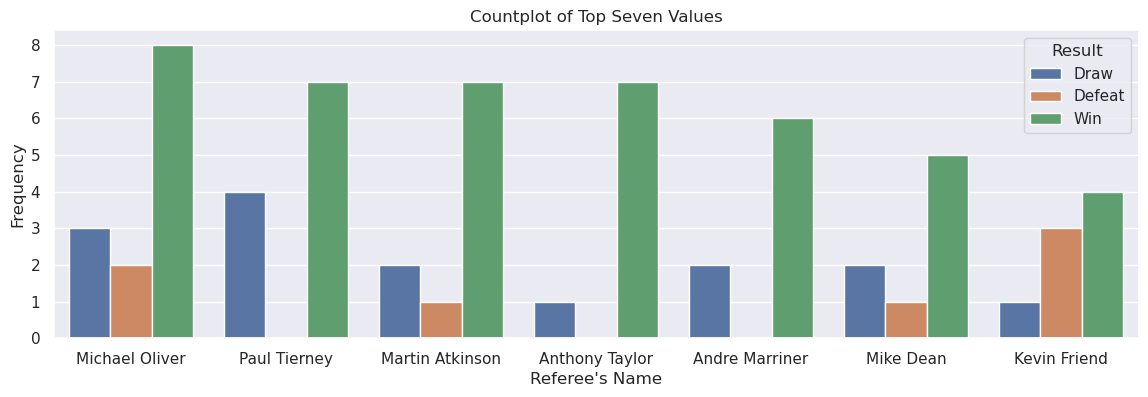

In [65]:
plt.figure(figsize = (14,4))
# get the ten largest counts of unique values in column 'A'
top_values = Liver['referee'].value_counts().nlargest(7)

# create a countplot of the top ten values
sns.countplot(data=Liver[Liver['referee'].isin(top_values.index)], x='referee', hue = 'Result', order=top_values.index)

# add labels to the plot
plt.xlabel("Referee's Name")
plt.ylabel("Frequency")
plt.title("Countplot of Top Seven Values")
plt.show()

# Among the seven teams, they have faced off against each other multiple times. To determine the team with the most face-offs, we would need additional information on the number of matches between each team

In [66]:
team_face_most = Liver['Away_team_name'].value_counts().nlargest(7)

In [67]:
team_face_most

Chelsea            14
Arsenal            12
Everton            10
Manchester City    10
Crystal Palace      7
Southampton         7
West Ham United     7
Name: Away_team_name, dtype: int64

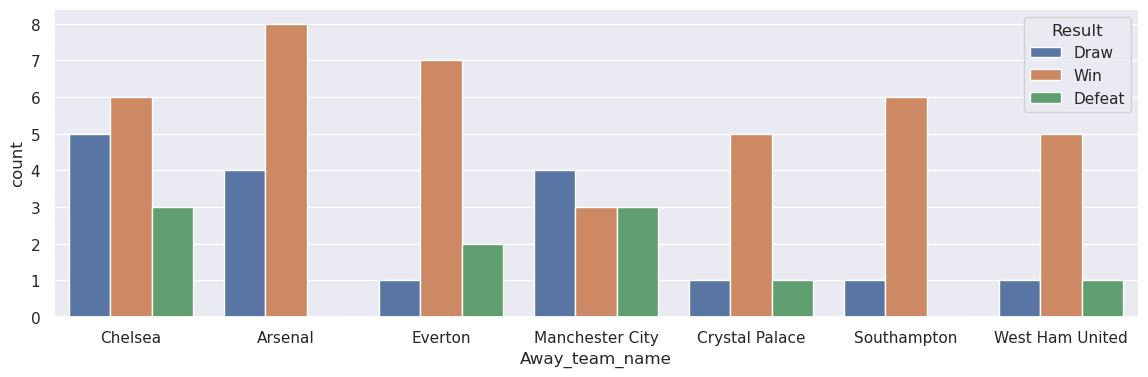

In [68]:
plt.figure(figsize = (14,4))
sns.countplot(data=Liver, x='Away_team_name', order=team_face_most.index, hue = 'Result')
plt.show()

we never Defeat by southamton

# Top 5 match has most attendance.

In [69]:
Liver.head(5)

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date,Result
12,2,Liverpool,2,Arsenal,53267.0,Paul Tierney,"Anfield, Liverpool",2022/23,"Sun 9 Apr 2023, 16:30 BST",Draw
49,7,Liverpool,0,Manchester United,53001.0,Andy Madley,"Anfield, Liverpool",2022/23,"Sun 5 Mar 2023, 16:30 GMT",Win
74,2,Liverpool,0,Everton,53027.0,Simon Hooper,"Anfield, Liverpool",2022/23,"Mon 13 Feb 2023, 20:00 GMT",Win
94,0,Liverpool,0,Chelsea,53126.0,Michael Oliver,"Anfield, Liverpool",2022/23,"Sat 21 Jan 2023, 12:30 GMT",Draw
130,2,Liverpool,1,Leicester City,53343.0,Craig Pawson,"Anfield, Liverpool",2022/23,"Fri 30 Dec 2022, 20:00 GMT",Win


In [74]:
top_five = Liver['attendance'].nlargest(5)
top_five = top_five.to_dict().values()
top_five = list(top_five)

In [71]:
top_five

551      75000.0
33147    53373.0
185      53346.0
130      53343.0
25182    53333.0
Name: attendance, dtype: float64

In [72]:
top = pd.DataFrame(columns = df.columns)

In [ ]:
for t in top_five:
    top = top.append(Liver[Liver['attendance'] == top_five[0]])

In [76]:
top

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date,Result
551,0,Liverpool,1,Real Madrid,75000.0,Clément Turpin,"Stade de France, Saint-Denis",2021/22,"Sat 28 May 2022, 20:36 BST",Defeat
551,0,Liverpool,1,Real Madrid,75000.0,Clément Turpin,"Stade de France, Saint-Denis",2021/22,"Sat 28 May 2022, 20:36 BST",Defeat
551,0,Liverpool,1,Real Madrid,75000.0,Clément Turpin,"Stade de France, Saint-Denis",2021/22,"Sat 28 May 2022, 20:36 BST",Defeat
551,0,Liverpool,1,Real Madrid,75000.0,Clément Turpin,"Stade de France, Saint-Denis",2021/22,"Sat 28 May 2022, 20:36 BST",Defeat
551,0,Liverpool,1,Real Madrid,75000.0,Clément Turpin,"Stade de France, Saint-Denis",2021/22,"Sat 28 May 2022, 20:36 BST",Defeat


In [ ]:
sns.barplot(data = top , x = 'Away_team_name', y = 'attendance', hue = 'Result')
plt.xticks(rotation=45, ha='right')
plt.show()

In [78]:
Liver.head(5)

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date,Result
12,2,Liverpool,2,Arsenal,53267.0,Paul Tierney,"Anfield, Liverpool",2022/23,"Sun 9 Apr 2023, 16:30 BST",Draw
49,7,Liverpool,0,Manchester United,53001.0,Andy Madley,"Anfield, Liverpool",2022/23,"Sun 5 Mar 2023, 16:30 GMT",Win
74,2,Liverpool,0,Everton,53027.0,Simon Hooper,"Anfield, Liverpool",2022/23,"Mon 13 Feb 2023, 20:00 GMT",Win
94,0,Liverpool,0,Chelsea,53126.0,Michael Oliver,"Anfield, Liverpool",2022/23,"Sat 21 Jan 2023, 12:30 GMT",Draw
130,2,Liverpool,1,Leicester City,53343.0,Craig Pawson,"Anfield, Liverpool",2022/23,"Fri 30 Dec 2022, 20:00 GMT",Win


/tmp/ipykernel_28/476025605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Liver.corr())


<Axes: >

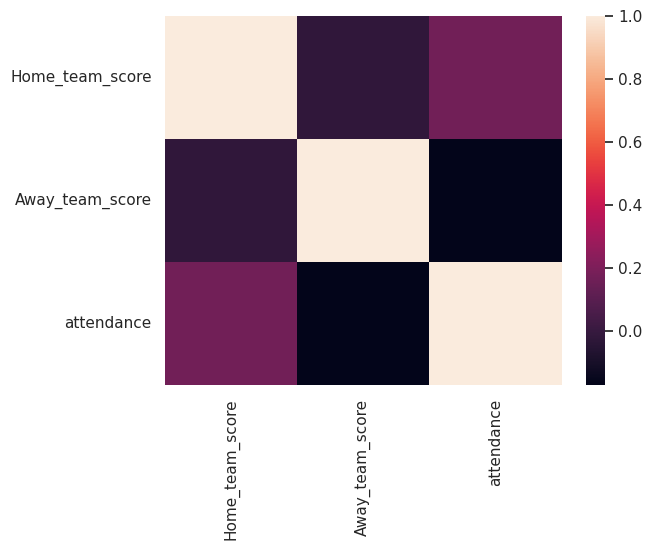

In [79]:
sns.heatmap(Liver.corr())

In [80]:
mother_of_stadium = df[df['Result'] == 'Win']['stadium'].value_counts().nlargest(5).to_dict()

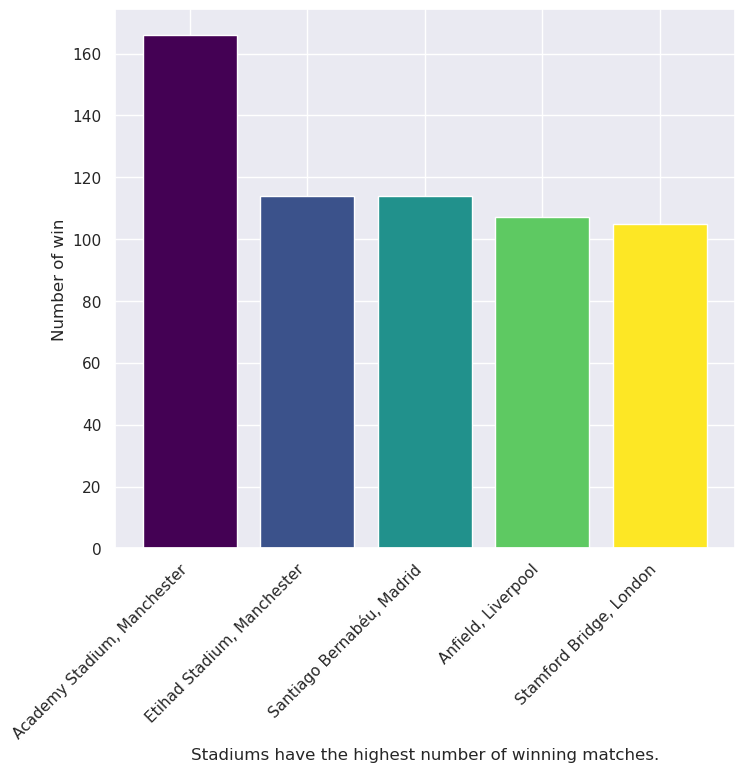

In [81]:

plt.figure(figsize = (8,7))
colors = plt.cm.viridis(np.linspace(0, 1, 5))
plt.bar( list(mother_of_stadium.keys()),list(mother_of_stadium.values()),  color=colors)
plt.xlabel("Stadiums have the highest number of winning matches.")
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Number of win')
plt.show()

Stadium has most attendance

In [82]:
most = df.groupby('stadium')['attendance'].sum()
most = most.sort_values(ascending = False)
most = most.to_dict()

In [83]:
test = pd.DataFrame(columns = ['stadium', 'attendance'])
test['stadium'] = most.keys()
test['attendance'] = most.values()
test['attendance'] = test['attendance'].astype(int)
test.head(7)

,stadium,attendance
0,"Old Trafford, Manchester",7455547
1,"Emirates Stadium, London",6001604
2,"Anfield, Liverpool",5652828
3,"Etihad Stadium, Manchester",5363918
4,"London Stadium, London",5002405
5,"Stamford Bridge, London",4994013
6,"Tottenham Hotspur Stadium, London",4492448


Old Traffort of MU has most attendance 

**Change type of attendance**

In [86]:
df.head(3)

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date,Result
0,2,West Ham United,2,Arsenal,14652.083333,David Coote,"London Stadium, London",2022/23,"Sun 16 Apr 2023, 14:00 BST",Draw
1,2,Tottenham Hotspur,3,Bournemouth,61369.000000,Andy Madley,"Tottenham Hotspur Stadium, London",2022/23,"Sat 15 Apr 2023, 15:15 BST",Defeat
2,0,Southampton,2,Crystal Palace,30309.000000,Michael Oliver,"St. Mary's Stadium, Southampton",2022/23,"Sat 15 Apr 2023, 15:00 BST",Defeat


In [ ]:
df_copy = df.copy()
df_copy['Date'].str.split(' ').to_list()

In [153]:
df_copy = df.copy()
da = df_copy['Date'].str.split(' ').to_list()
x_list = []
for x in da:
    x_list.append(x[1] + ' ' +x[2] + ' ' +x[3] +' '+ x[4])

Add Hour column to DataFrame

In [155]:
df['hour'] = x_list

In [159]:
df['Date'] = pd.to_datetime(df['hour'])

In [161]:
df.drop('hour', axis = 1, inplace = True)

In [163]:
df['Hour'] = df['Date'].dt.hour

<Axes: xlabel='Hour', ylabel='count'>

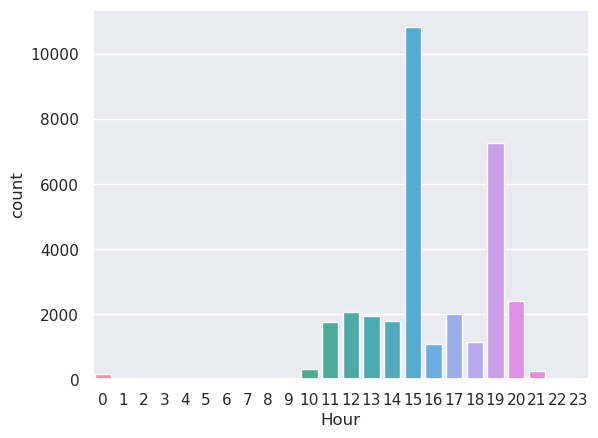

In [169]:
sns.countplot(data = df, x = 'Hour')

> Matches usually starts from 11:00 am to 20:00 pm

**Rate wining of team when they are in their stadium**